In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR

In [81]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [82]:
gk_df = pd.read_csv('data/goalkeeper.csv')

In [83]:
gk_df.head()

,Unnamed: 0,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,positions,Category
0,110,Sergio Asenjo,Spain,Villarreal CF,Sub,1.0,06/30/2014,2022.0,84,189 cm,87 kg,Right,06/28/1989,27,GK,Medium / Medium,3,1,14,15,12,14,15,20,79,12,22,46,39,24,39,39,59,54,43,73,58,62,73,13,24,14,23,23,22,15,22,82,86,76,83,85,GK,3
1,113,Steve Mandanda,France,Crystal Palace,Sub,30.0,07/01/2016,2019.0,84,185 cm,82 kg,Right,03/28/1985,32,GK,Medium / Medium,3,1,17,15,10,13,15,37,81,11,23,55,63,14,37,28,53,43,31,61,36,52,74,13,24,13,11,13,12,11,13,80,86,77,80,85,GK,3
2,168,Claudio Bravo,Chile,Manchester City,Sub,1.0,08/25/2016,2020.0,83,184 cm,80 kg,Right,04/13/1983,33,GK,Medium / Medium,3,1,15,13,11,19,18,40,77,15,23,71,60,12,32,31,58,54,44,70,64,64,81,18,22,13,21,25,60,23,11,77,82,87,84,82,GK,3
3,171,Asmir Begović,Bosnia Herzegovina,Chelsea,Sub,1.0,07/13/2015,2019.0,83,200 cm,83 kg,Right,06/20/1987,29,GK,Medium / Medium,2,1,24,16,13,12,11,42,79,11,21,31,62,14,26,32,52,58,36,80,41,53,38,12,28,12,12,17,15,40,12,80,83,74,81,84,GK,3
4,207,Loris Karius,Germany,Liverpool,Sub,1.0,07/01/2016,2021.0,82,190 cm,87 kg,Right,06/22/1993,23,GK,Medium / Medium,3,1,23,16,13,13,11,18,82,8,13,45,34,14,35,37,51,50,36,55,43,51,74,14,20,18,16,12,14,19,14,79,84,76,75,85,GK,3


In [84]:
gk_df.shape

(2003, 54)

In [85]:
gk_df.columns

Index(['Unnamed: 0', 'Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'positions', 'Category'], dtype='object')

In [86]:
gk_lr = gk_df.drop(['Unnamed: 0','Height', 'Weight','Nationality','Club','Club_Position',
        'Club_Kit', 'Club_Joining', 'Contract_Expiry','Preffered_Foot',
        'Birth_Date','Preffered_Position','Category'], 
         axis = 1)

In [87]:
corr = pd.DataFrame(gk_lr.corr())

In [88]:
corr

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Rating,1.000000,0.499749,0.145195,0.018665,0.226065,0.122810,0.109637,-0.014128,-0.026888,0.283005,0.830552,0.186300,0.261858,0.406743,0.444896,0.043150,0.212669,0.253171,0.347759,0.356807,0.206724,0.364073,0.023349,0.391472,0.431182,0.023827,0.120036,0.134590,0.157918,0.059532,0.107109,0.189797,0.156307,0.923319,0.921722,0.754383,0.911329,0.926266
Age,0.499749,1.000000,0.065253,0.022306,0.152056,0.051399,0.119891,0.009605,-0.031776,0.364193,0.486925,0.171287,0.202129,0.195369,0.453494,0.036087,0.059484,0.124341,0.136567,0.148463,0.112062,0.250941,-0.003869,0.244688,0.248413,0.013999,0.018013,0.070446,0.087621,-0.001738,0.085529,0.097437,0.105718,0.557857,0.393684,0.389531,0.459179,0.378762
Weak_foot,0.145195,0.065253,1.000000,-0.016551,0.132281,0.094461,0.041050,0.031213,0.023798,0.021890,0.121671,0.026719,0.048643,0.097567,0.100282,0.047219,0.096465,0.089033,0.081048,0.086193,0.061648,0.051061,0.058674,0.074418,0.058024,0.061510,0.044374,0.032156,0.075118,0.065882,0.078838,0.080235,0.030173,0.123120,0.130623,0.193720,0.151618,0.108652
Skill_Moves,0.018665,0.022306,-0.016551,1.000000,0.043103,0.033773,0.024455,0.040005,0.053866,0.085719,-0.026761,0.003685,0.037683,0.061432,0.035390,0.144870,-0.006175,-0.038798,0.024270,0.025965,0.071114,0.027108,-0.015902,-0.000382,0.020325,0.028283,-0.026704,-0.005600,-0.000412,0.043423,0.025805,0.000133,0.001127,0.020225,0.021678,0.021235,0.030870,0.018587
Ball_Control,0.226065,0.152056,0.132281,0.043103,1.000000,0.376792,0.248577,0.159603,0.137813,0.168992,0.226047,0.229511,0.255895,0.121177,0.199515,0.204193,0.365792,0.312598,0.304226,0.282789,0.208953,0.113977,0.140035,0.219074,0.182249,0.236723,0.265925,0.245945,0.288175,0.172827,0.145277,0.345255,0.251645,0.184089,0.216826,0.186328,0.186096,0.219196
Dribbling,0.122810,0.051399,0.094461,0.033773,0.376792,1.000000,0.436896,0.322615,0.373364,0.073680,0.146454,0.297547,0.250645,0.098676,0.061716,0.358809,0.311107,0.233435,0.281256,0.272604,0.204110,0.096590,0.182414,0.173075,0.106731,0.325150,0.143063,0.430197,0.438098,0.306298,0.259902,0.287082,0.418671,0.085719,0.139233,0.119894,0.082857,0.117108
Marking,0.109637,0.119891,0.041050,0.024455,0.248577,0.436896,1.000000,0.420895,0.428445,0.080249,0.176907,0.441222,0.390792,0.001498,0.024041,0.412007,0.216654,0.128845,0.329808,0.324994,0.269669,0.125844,0.195124,0.130024,0.103200,0.355955,0.072345,0.509966,0.477079,0.295014,0.264453,0.278216,0.511073,0.103184,0.125623,0.089967,0.046035,0.080854
Sliding_Tackle,-0.014128,0.009605,0.031213,0.040005,0.159603,0.322615,0.420895,1.000000,0.528538,0.054121,0.056166,0.173736,0.200545,0.032503,-0.032009,0.317320,0.196749,0.149783,0.174049,0.177789,0.112299,0.034614,0.131093,0.049140,0.019607,0.296109,0.099258,0.258732,0.294337,0.206288,0.173109,0.152025,0.290586,-0.020746,0.001399,-0.001874,-0.053558,-0.018150
Standing_Tackle,-0.026888,-0.031776,0.023798,0.053866,0.137813,0.373364,0.428445,0.528538,1.000000,0.008721,0.033198,0.207209,0.201537,0.013517,-0.051309,0.339699,0.217494,0.128012,0.138608,0.143699,0.128528,0.016941,0.109655,0.011340,-0.017285,0.273477,0.125073,0.310005,0.310903,0.221254,0.204545,0.163186,0.307994,-0.029309,-0.013031,-0.021198,-0.057743,-0.030461
Aggression,0.283005,0.364193,0.021890,0.085719,0.168992,0.073680,0.080249,0.054121,0.008721,1.000000,0.273244,0.126989,0.217616,0.221318,0.436746,0.090539,0.149399,0.226540,0.191861,0.185018,0.230163,0.239452,0.002425,0.242753,0.225328,0.041842,0.070180,0.043615,0.103799,0.025506,0.064827,0.092200,0.071896,0.272098,0.224321,0.237492,0.264455,0.245948


In [89]:
corr.sort_values('Rating', ascending = False, inplace = True)

In [90]:
corr.head()

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
Rating,1.000000,0.499749,0.145195,0.018665,0.226065,0.122810,0.109637,-0.014128,-0.026888,0.283005,0.830552,0.186300,0.261858,0.406743,0.444896,0.043150,0.212669,0.253171,0.347759,0.356807,0.206724,0.364073,0.023349,0.391472,0.431182,0.023827,0.120036,0.134590,0.157918,0.059532,0.107109,0.189797,0.156307,0.923319,0.921722,0.754383,0.911329,0.926266
GK_Reflexes,0.926266,0.378762,0.108652,0.018587,0.219196,0.117108,0.080854,-0.018150,-0.030461,0.245948,0.725550,0.156157,0.223755,0.364455,0.378399,0.025886,0.181475,0.209567,0.340701,0.336845,0.172860,0.301145,0.046302,0.365342,0.416008,0.027070,0.106238,0.122422,0.139666,0.042044,0.100501,0.166870,0.137917,0.791893,0.882692,0.665616,0.780590,1.000000
GK_Positioning,0.923319,0.557857,0.123120,0.020225,0.184089,0.085719,0.103184,-0.020746,-0.029309,0.272098,0.733829,0.168539,0.240022,0.373213,0.430000,0.047692,0.183530,0.229120,0.271659,0.287207,0.173913,0.356746,-0.026597,0.330124,0.348828,0.016012,0.102658,0.101532,0.128801,0.048850,0.082672,0.141536,0.131269,1.000000,0.779434,0.690873,0.848234,0.791893
GK_Diving,0.921722,0.393684,0.130623,0.021678,0.216826,0.139233,0.125623,0.001399,-0.013031,0.224321,0.729292,0.172169,0.240689,0.351214,0.372945,0.039583,0.207846,0.230508,0.375640,0.373121,0.213947,0.311685,0.066374,0.397597,0.442380,0.041091,0.120455,0.144131,0.168262,0.060835,0.087828,0.176635,0.161073,0.779434,1.000000,0.668813,0.777484,0.882692
GK_Handling,0.911329,0.459179,0.151618,0.030870,0.186096,0.082857,0.046035,-0.053558,-0.057743,0.264455,0.689314,0.123934,0.194185,0.386150,0.407668,0.023482,0.179274,0.236029,0.240682,0.252281,0.162845,0.329397,-0.044433,0.323841,0.347587,-0.012621,0.119473,0.073659,0.109805,0.042100,0.090500,0.164967,0.103196,0.848234,0.777484,0.690771,1.000000,0.780590


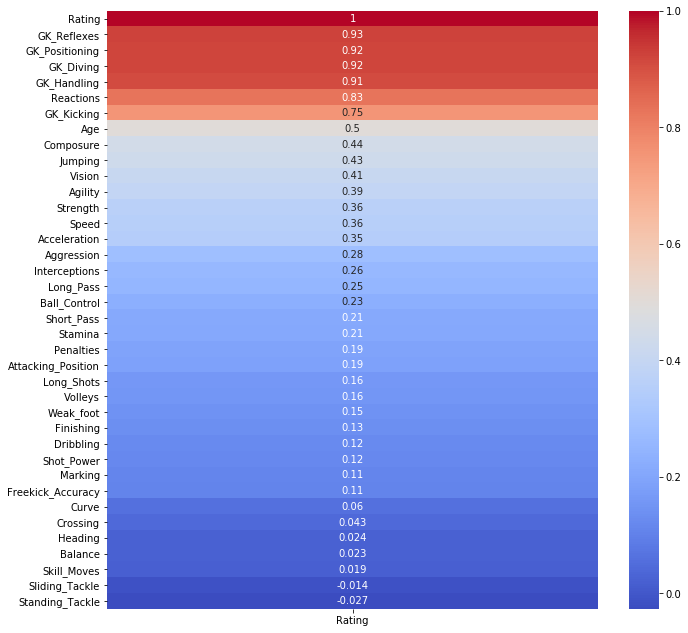

In [93]:
plt.figure(figsize=(11,11))
sns.heatmap(corr[['Rating']],annot = True, cmap='coolwarm');

In [94]:
gk_rating_features = ['GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 
                      'GK_Reflexes','Jumping','Vision']

In [95]:
X_gk_lr = gk_df[gk_rating_features]

y_gk_lr = gk_df[['Rating']]

X_gk_train, X_gk_test, y_gk_train, y_gk_test = train_test_split(X_gk_lr,
                                                    y_gk_lr,
                                                    test_size=0.30, 
                                                    random_state=77)

In [96]:
lr_gk = LinearRegression()

lr_gk.fit(X_gk_train, y_gk_train)

print(f' CV: {cross_val_score(lr_gk, X_gk_train, y_gk_train, cv = 5).mean()}')
print(f' Train: {lr_gk.score(X_gk_train, y_gk_train)}')
print(F' Test: {lr_gk.score(X_gk_test, y_gk_test)}')

 CV: 0.9900614523530754
 Train: 0.9902281135928959
 Test: 0.9905061574753581
